In [1]:
# %load_ext lab_black
# Python standard library
from glob import glob, iglob
import os
import socket
import sys

# 3rd party library imports
import matplotlib.pyplot as plt
import pandas as pd
import pyrosetta
import numpy as np
import scipy
import seaborn as sns
from tqdm.auto import tqdm  # jupyter compatible progress bar
sys.path.insert(0, '/home/broerman/projects/crispy_shifty/')


tqdm.pandas()  # link tqdm to pandas
# Notebook magic
# save plots in the notebook
%matplotlib inline
# reloads modules automatically before executing cells
%load_ext autoreload
%autoreload 2
print(f"running in directory: {os.getcwd()}")  # where are we?
print(f"running on node: {socket.gethostname()}")  # what node are we on?

running in directory: /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers
running on node: sofia


In [2]:
scores_files = sorted(glob('06_alphafold_two_state/predicted_designs_*/full_scores_df.json'))

frames = []
for scores_file in scores_files:
    frames.append(pd.read_json(scores_file))

scores_df = pd.concat(frames)

In [3]:
import pyrosetta.distributed.cluster as cluster
for design_file in iglob('06_alphafold_two_state/predicted_designs_*/design_models/*.pdb'):
    index = design_file.split('/')[-1].split('.')[0].split('_')[-1]
    scores_df.at[index, 'design_path'] = design_file
    input_path = cluster.get_scores_dict(design_file)['instance']['tasks']['pdb_path']
    scores_df.at[index, 'input_path'] = input_path

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [4]:
scores_df

,plddt_A,rmsd_A,plddt_B,rmsd_B,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,...,wnm_all_B_Y,wnm_hlx_X,wnm_hlx_Y,msd_input_model,design_path,Y-X,A_Y-X,B_Y-X,int_upweight,input_path
1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9,94.630,1.012,94.554,1.255,6.350,9.320,9.323,9.316,5.778,87.176,...,0.698565,0.087024,0.127943,af2,06_alphafold_two_state/predicted_designs_01/de...,98.897339,108.786041,127.762482,NaN,/home/broerman/projects/crispy_shifty/projects...
255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624,94.129,0.996,93.734,1.357,5.291,6.145,6.302,5.987,3.790,90.787,...,0.565111,0.107692,0.149773,af2,06_alphafold_two_state/predicted_designs_01/de...,15.917236,98.192017,52.484680,NaN,/home/broerman/projects/crispy_shifty/projects...
83f754e768acee18806c02aa6aaaf5eaaab7680b021cd0dd,94.775,1.030,92.561,0.723,5.690,6.853,7.105,6.601,3.469,90.365,...,0.408991,0.117793,0.162170,af2,06_alphafold_two_state/predicted_designs_01/de...,8.930542,75.135193,72.099792,NaN,/home/broerman/projects/crispy_shifty/projects...
8bc1e5e9d55109cf4288916f54748e5292471222971c4195,94.676,0.969,96.345,0.687,4.380,6.597,6.522,6.672,4.995,91.958,...,0.515160,0.104751,0.136546,af2,06_alphafold_two_state/predicted_designs_01/de...,48.428711,98.835388,75.293823,NaN,/home/broerman/projects/crispy_shifty/projects...
9ebf5dcd4ffc1ee1009cba98bb6893c1c3e11f2574b87668,95.221,0.964,89.343,1.551,6.897,12.705,12.941,12.469,5.920,84.841,...,0.642673,0.097121,0.121398,af2,06_alphafold_two_state/predicted_designs_01/de...,39.667480,105.434204,75.468506,NaN,/home/broerman/projects/crispy_shifty/projects...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dce6636ec0f9519951272919f0acccccc26ffbf5ec8de877,94.307,0.828,94.925,0.790,4.204,5.287,5.390,5.184,3.606,93.422,...,0.864269,0.092371,0.114760,rosetta,06_alphafold_two_state/predicted_designs_4/des...,21.421021,77.871582,107.439697,3.0,/home/broerman/projects/crispy_shifty/projects...
dd41bb7698b5e46b032442503000a1e66f3cdb529bfe2e18,95.190,0.648,92.933,1.340,6.113,7.921,7.847,7.994,4.538,90.132,...,0.546692,0.086270,0.145785,rosetta,06_alphafold_two_state/predicted_designs_4/des...,3.196655,98.127075,64.434692,3.0,/home/broerman/projects/crispy_shifty/projects...
ec30d34aa580169b6c6a785c6b1bf34fd625bea1086a2230,87.040,2.138,96.279,0.829,6.231,7.228,7.363,7.093,3.502,90.776,...,0.954230,0.095202,0.112086,rosetta,06_alphafold_two_state/predicted_designs_4/des...,29.649536,78.381104,109.714111,3.0,/home/broerman/projects/crispy_shifty/projects...
f2f7d7aaf8db8e89034af89be1dcaab54baa386ab61c34e3,94.658,1.471,89.748,2.063,8.005,9.280,9.421,9.139,3.836,90.461,...,0.790471,0.102072,0.109855,rosetta,06_alphafold_two_state/predicted_designs_4/des...,-3.899536,71.546997,86.365143,3.0,/home/broerman/projects/crispy_shifty/projects...


In [5]:
def get_parents(df):
    parents = []
    for key, row in df.iterrows():
        parent = row['parent']
        if parent not in parents:
            parents.append(parent)
    print(len(parents))
    return parents

In [6]:
print(scores_df['input_path'].nunique())
print(scores_df['parent'].nunique())

print(get_parents(scores_df))

60
20
20
['X26_3_20_2_ct1_fe', 'X22_3_16_4_ct4_fa', 'X18_4_23_4_ct3_ff', 'X19_3_18_4_ct4_fd', 'X27_2_27_2_ct5_fg', 'X23_4_26_3_ct8_fc', 'X26_3_24_2_ct12_fe', 'X18_4_22_4_ct0_ff', 'X23_2_15_3_ct5_fe', 'X19_3_17_2_ct9_fe', 'DHR62', 'DHR82', 'hDHR64_5CWM', 'X20_3_25_2_ct9_fa', 'DHR26_nocys', 'X24_2_24_2_ct18_fg', 'X24_2_24_2_ct5_ff', 'X26_3_27_4_ct2_fe', 'hDHR79_5CWP', 'X19_3_17_2_ct6_fc']


In [7]:
def filter_df(df, cutoffs):
    filtered_df = df

    for score_term, cutoff, greaterthan in cutoffs:
        if greaterthan:
            filtered_df = filtered_df[filtered_df[score_term] > cutoff]
        else:
            filtered_df = filtered_df[filtered_df[score_term] < cutoff]

    print(len(filtered_df))
    
    return filtered_df

In [8]:
# Filter designs

cutoffs = [
    ('pae_interaction', 10, 0),
    # ('rmsd', 3, 0)
]

filtered_df = filter_df(scores_df, cutoffs)
filtered_df

236


,plddt_A,rmsd_A,plddt_B,rmsd_B,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,...,wnm_all_B_Y,wnm_hlx_X,wnm_hlx_Y,msd_input_model,design_path,Y-X,A_Y-X,B_Y-X,int_upweight,input_path
1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9,94.630,1.012,94.554,1.255,6.350,9.320,9.323,9.316,5.778,87.176,...,0.698565,0.087024,0.127943,af2,06_alphafold_two_state/predicted_designs_01/de...,98.897339,108.786041,127.762482,NaN,/home/broerman/projects/crispy_shifty/projects...
255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624,94.129,0.996,93.734,1.357,5.291,6.145,6.302,5.987,3.790,90.787,...,0.565111,0.107692,0.149773,af2,06_alphafold_two_state/predicted_designs_01/de...,15.917236,98.192017,52.484680,NaN,/home/broerman/projects/crispy_shifty/projects...
83f754e768acee18806c02aa6aaaf5eaaab7680b021cd0dd,94.775,1.030,92.561,0.723,5.690,6.853,7.105,6.601,3.469,90.365,...,0.408991,0.117793,0.162170,af2,06_alphafold_two_state/predicted_designs_01/de...,8.930542,75.135193,72.099792,NaN,/home/broerman/projects/crispy_shifty/projects...
8bc1e5e9d55109cf4288916f54748e5292471222971c4195,94.676,0.969,96.345,0.687,4.380,6.597,6.522,6.672,4.995,91.958,...,0.515160,0.104751,0.136546,af2,06_alphafold_two_state/predicted_designs_01/de...,48.428711,98.835388,75.293823,NaN,/home/broerman/projects/crispy_shifty/projects...
bfee0bbf61516d25858aa572037d81cf90a889f225de2ca5,95.593,1.032,93.488,1.086,4.341,5.476,5.575,5.377,3.864,92.619,...,0.908309,0.099617,0.108622,rosetta,06_alphafold_two_state/predicted_designs_01/de...,19.034180,86.989685,89.554626,NaN,/home/broerman/projects/crispy_shifty/projects...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dce6636ec0f9519951272919f0acccccc26ffbf5ec8de877,94.307,0.828,94.925,0.790,4.204,5.287,5.390,5.184,3.606,93.422,...,0.864269,0.092371,0.114760,rosetta,06_alphafold_two_state/predicted_designs_4/des...,21.421021,77.871582,107.439697,3.0,/home/broerman/projects/crispy_shifty/projects...
dd41bb7698b5e46b032442503000a1e66f3cdb529bfe2e18,95.190,0.648,92.933,1.340,6.113,7.921,7.847,7.994,4.538,90.132,...,0.546692,0.086270,0.145785,rosetta,06_alphafold_two_state/predicted_designs_4/des...,3.196655,98.127075,64.434692,3.0,/home/broerman/projects/crispy_shifty/projects...
ec30d34aa580169b6c6a785c6b1bf34fd625bea1086a2230,87.040,2.138,96.279,0.829,6.231,7.228,7.363,7.093,3.502,90.776,...,0.954230,0.095202,0.112086,rosetta,06_alphafold_two_state/predicted_designs_4/des...,29.649536,78.381104,109.714111,3.0,/home/broerman/projects/crispy_shifty/projects...
f2f7d7aaf8db8e89034af89be1dcaab54baa386ab61c34e3,94.658,1.471,89.748,2.063,8.005,9.280,9.421,9.139,3.836,90.461,...,0.790471,0.102072,0.109855,rosetta,06_alphafold_two_state/predicted_designs_4/des...,-3.899536,71.546997,86.365143,3.0,/home/broerman/projects/crispy_shifty/projects...


In [9]:
print(filtered_df['input_path'].nunique())
print(filtered_df['parent'].nunique())

print(get_parents(filtered_df))

52
17
17
['X26_3_20_2_ct1_fe', 'X18_4_23_4_ct3_ff', 'X19_3_18_4_ct4_fd', 'X27_2_27_2_ct5_fg', 'X23_4_26_3_ct8_fc', 'X18_4_22_4_ct0_ff', 'X23_2_15_3_ct5_fe', 'X19_3_17_2_ct9_fe', 'DHR62', 'hDHR64_5CWM', 'X20_3_25_2_ct9_fa', 'X22_3_16_4_ct4_fa', 'DHR26_nocys', 'X24_2_24_2_ct18_fg', 'X24_2_24_2_ct5_ff', 'X26_3_24_2_ct12_fe', 'X19_3_17_2_ct6_fc']


43it [00:00, 50.22it/s]


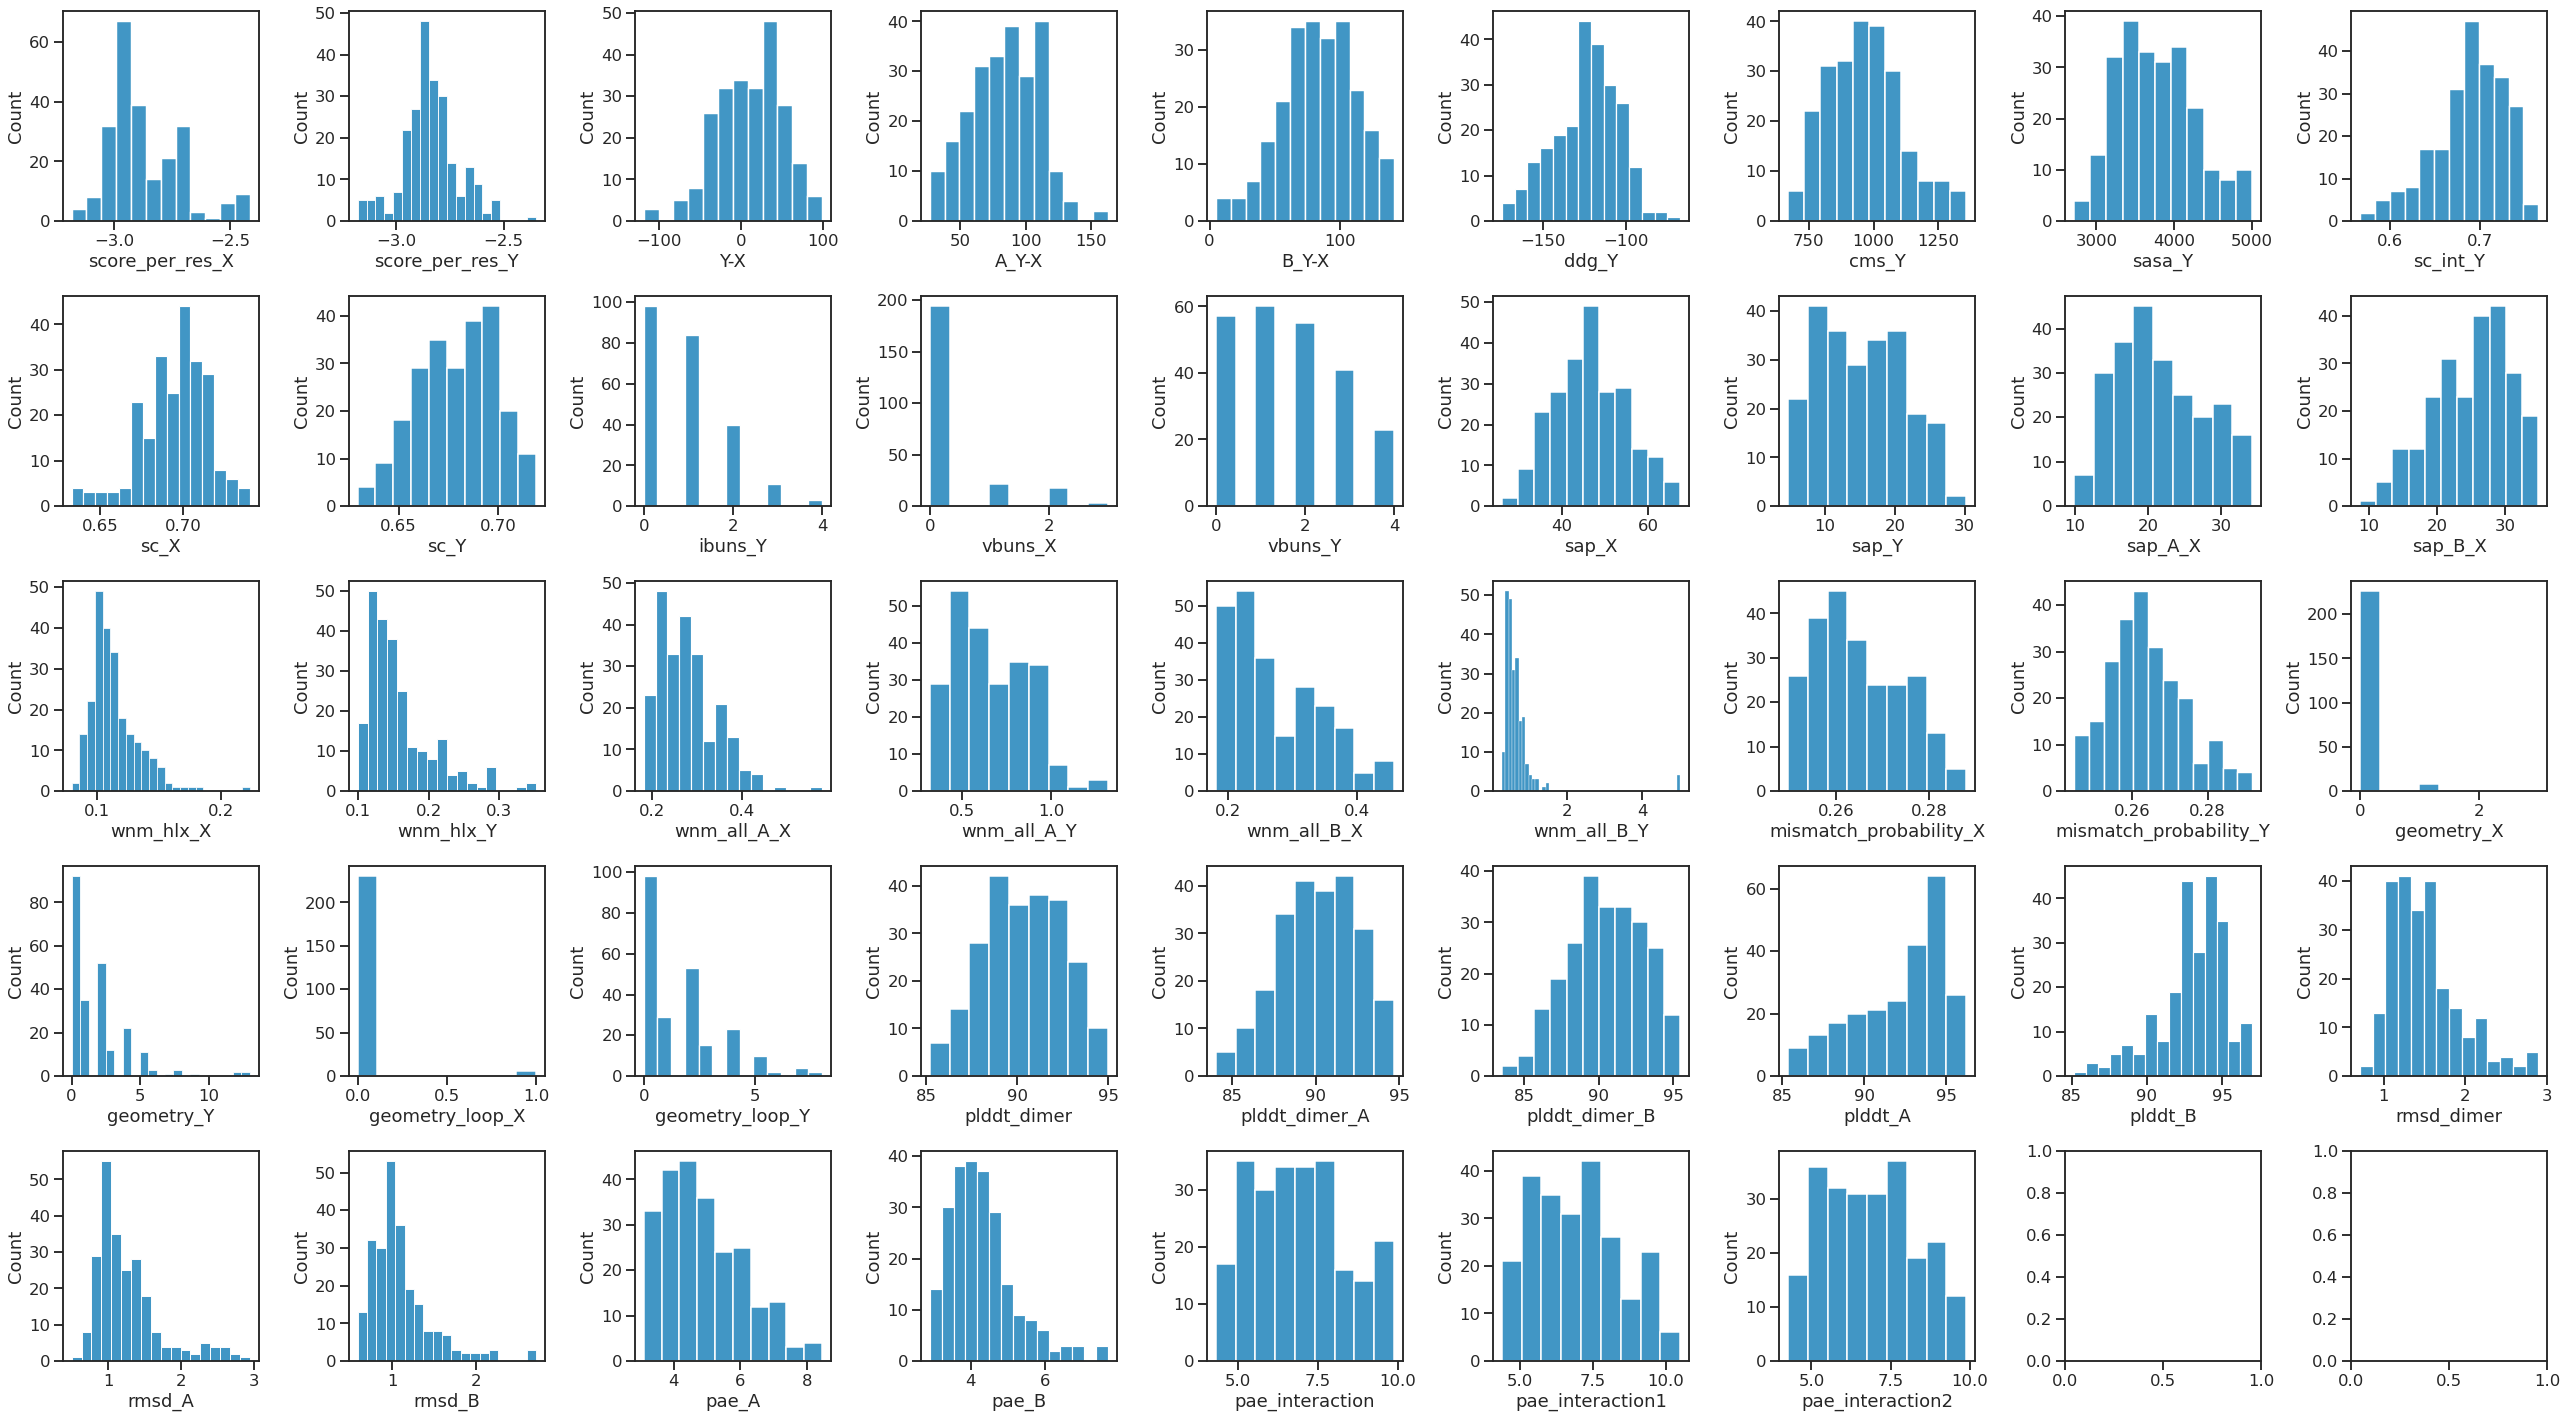

In [16]:
from crispy_shifty.plotting.utils import histplot_df

sns.set(
    context="talk",
    font_scale=1,  # make the font larger; default is pretty small
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

cols = [
        "score_per_res_X",
        "score_per_res_Y",
        "Y-X",
        "A_Y-X",
        "B_Y-X",
        "ddg_Y",
        "cms_Y",
        "sasa_Y",
        "sc_int_Y",
        "sc_X",
        "sc_Y",
        "ibuns_Y",
        "vbuns_X",
        "vbuns_Y",
        "sap_X",
        "sap_Y",
        "sap_A_X",
        "sap_B_X",
        "wnm_hlx_X",
        "wnm_hlx_Y",
        "wnm_all_A_X",
        "wnm_all_A_Y",
        "wnm_all_B_X",
        "wnm_all_B_Y",
        "mismatch_probability_X",
        "mismatch_probability_Y",
        "geometry_X",
        "geometry_Y",
        "geometry_loop_X",
        "geometry_loop_Y",
        'plddt_dimer',
        'plddt_dimer_A',
        'plddt_dimer_B',
        'plddt_A',
        'plddt_B',
        'rmsd_dimer',
        'rmsd_A',
        'rmsd_B',
        'pae_A',
        'pae_B',
        'pae_interaction',
        'pae_interaction1',
        'pae_interaction2',
    #     "parent",
    ]

# make sure all the columns to plot are numeric
# filtered_df[cols] = filtered_df[cols].astype(float)
fig, axs = histplot_df(filtered_df, cols=cols, save_path='07_collect/predicted_dimer_metrics.png')

# pairplot these as well

In [24]:
# Of these, decide which to order by checking homodimerization.
# Build a silent file with the homodimers of each design.

from more_itertools import ichunked

with open('07_collect/homodimers/model_homodimers.tasks', 'w') as tasks_f:
    for i, paths in enumerate(ichunked(filtered_df['design_path'], 10)):
        tasks_f.write(f'07_collect/model_homodimers.py 07_collect/homodimers/silents/{i:02d}.silent ' + ' '.join(paths) + '\n')

In [25]:
print("sbatch -a 1-$(cat 07_collect/homodimers/model_homodimers.tasks | wc -l) 07_collect/homodimers/model_homodimers.sh")
print('cat 07_collect/homodimers/silents/*.silent > 07_collect/homodimers/homodimer_models.silent')

sbatch -a 1-$(cat 07_collect/homodimers/model_homodimers.tasks | wc -l) 07_collect/homodimers/model_homodimers.sh
cat 07_collect/homodimers/silents/*.silent > 07_collect/homodimers/homodimer_models.silent


In [26]:
print("""
cd projects/crispy_shifty/projects/crispy_shifty_dimers/07_collect/homodimers
conda activate /home/nrbennet/miniconda3/envs/ampere
/home/nrbennet/software/nates_local_tools/interfaceaf2create -prefix af2_complex_prediction -script /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/twoSidedInterfacePredict.py -silent /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/07_collect/homodimers/homodimer_models.silent -gres gpu:rtx2080:1 -args " -batch 1" -conda /mnt/home/nrbennet/miniconda3/envs/ampere -structs_per_job 100 -p gpu-bf

collected outputs with:
cat af2_complex_prediction_runs/*/out.silent > af2_predictions.silent
/home/nrbennet/software/bin/fast_merge_scorefiles af2_complex_prediction_runs

deleted Brian's running file structure, now that I have collected all the outputs
""")


cd projects/crispy_shifty/projects/crispy_shifty_dimers/07_collect/homodimers
conda activate /home/nrbennet/miniconda3/envs/ampere
/home/nrbennet/software/nates_local_tools/interfaceaf2create -prefix af2_complex_prediction -script /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/twoSidedInterfacePredict.py -silent /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/07_collect/homodimers/homodimer_models.silent -gres gpu:rtx2080:1 -args " -batch 1" -conda /mnt/home/nrbennet/miniconda3/envs/ampere -structs_per_job 100 -p gpu-bf

collected outputs with:
cat af2_complex_prediction_runs/*/out.silent > af2_predictions.silent
/home/nrbennet/software/bin/fast_merge_scorefiles af2_complex_prediction_runs

deleted Brian's running file structure, now that I have collected all the outputs



In [10]:
homodimers_df = pd.read_csv(
    '07_collect/homodimers/af2_complex_prediction_runs_combined.sc',
    sep=' ',
    index_col='description',
    usecols=list(range(1,12)))

homodimers_df.drop(columns='time', inplace=True)
homodimers_df.rename(columns={'plddt_total': 'plddt', 'pae_binder': 'pae_A', 'pae_target': 'pae_B', 'plddt_binder': 'plddt_A', 'plddt_target': 'plddt_B'}, index=lambda i: i[:-8], inplace=True)

homodimers_df

,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_A,plddt_B,plddt,rmsd
description,,,,,,,,,
X26_3_20_2_ct1_fe_0f929737bb80457302bb0cfef5261a67698760a173f93514_AA,3.409,26.757,26.763,26.751,3.386,94.247,94.359,94.303,10.562
X26_3_20_2_ct1_fe_0f929737bb80457302bb0cfef5261a67698760a173f93514_BB,3.513,26.640,26.682,26.598,3.441,94.212,94.438,94.325,12.138
X26_3_20_2_ct1_fe_1dd1e98ddf550ccd6c4094e96e9dd8c42ef6e4102cede79d_AA,7.083,27.381,27.394,27.369,7.060,86.010,86.262,86.136,19.440
X26_3_20_2_ct1_fe_1dd1e98ddf550ccd6c4094e96e9dd8c42ef6e4102cede79d_BB,2.971,27.251,27.248,27.254,2.977,95.798,95.882,95.840,10.915
X26_3_20_2_ct1_fe_212b05c11d91ec2fddacd35e152edb0801120c7487bc7d44_AA,3.462,26.782,26.914,26.650,3.446,94.386,94.317,94.351,18.721
...,...,...,...,...,...,...,...,...,...
X23_4_26_3_ct8_fc_e9953b00fd172ccdf3a390b26cac12338ec633ef8378cc74_BB,7.732,27.302,27.307,27.298,7.849,85.244,85.130,85.187,12.039
X23_4_26_3_ct8_fc_f9f00cb3fde6c4fe12d0d855db558640d3b90b23d6937b60_AA,4.778,7.540,7.545,7.534,4.715,87.265,87.341,87.303,2.707
X23_4_26_3_ct8_fc_f9f00cb3fde6c4fe12d0d855db558640d3b90b23d6937b60_BB,4.289,8.497,8.526,8.467,4.328,89.056,88.995,89.025,3.011


5it [00:00, 16.39it/s]


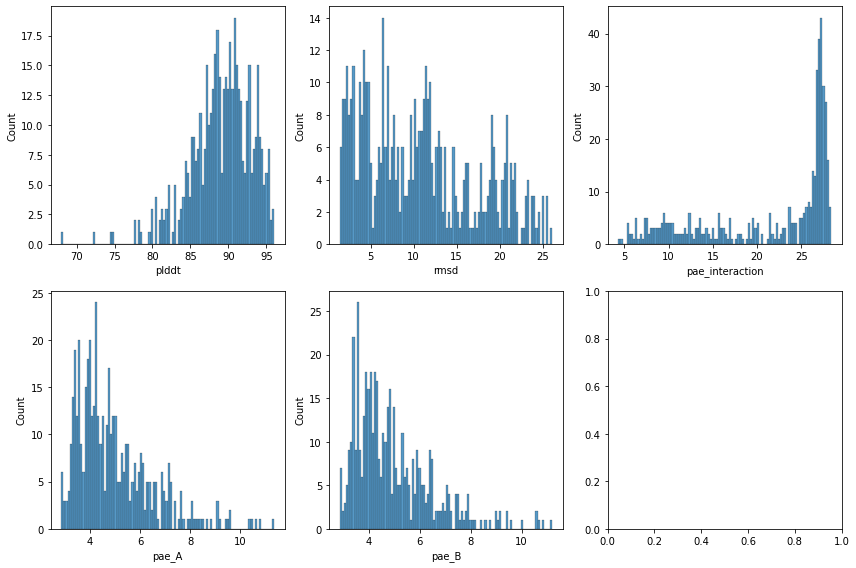

In [15]:
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "plddt",
        "rmsd",
        "pae_interaction",
        "pae_A",
        "pae_B",
    ]

# make sure all the columns to plot are numeric
fig, axs = histplot_df(homodimers_df, cols=cols, bins=100)

# pairplot these as well

In [11]:
for index, row in homodimers_df.iterrows():
    homodimer_str = index[-3:]
    homodimer_row = row.rename(index=lambda i: i + homodimer_str, inplace=False)
    
    des_uuid = index.split('_')[-2]
    filtered_df.loc[des_uuid, homodimer_row.index] = homodimer_row
    if '_AA' in index:
        filtered_df.loc[des_uuid, 'tag'] = index[:-3]

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
):
    display(filtered_df)

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)
/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a 

,plddt_A,rmsd_A,plddt_B,rmsd_B,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,plddt_dimer_B,plddt_dimer,rmsd_dimer,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dssp_A,dssp_B,fa_dun,fa_intra_rep,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,model,new_loop_resis,new_loop_resis_A,new_loop_resis_B,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,remodel_after_loop_A,remodel_before_loop_A,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,ala_penalty,buns_X,buns_Y,cms_Y,ddg_Y,dslf_fa13,dslf_fa13_X,dslf_fa13_Y,exposed_hydrophobics_X,exposed_hydrophobics_Y,fa_atr,fa_atr_X,fa_atr_Y,fa_dun_dev,fa_dun_dev_X,fa_dun_dev_Y,fa_dun_rot,fa_dun_rot_X,fa_dun_rot_Y,fa_dun_semi,fa_dun_semi_X,fa_dun_semi_Y,fa_elec,fa_elec_X,fa_elec_Y,fa_intra_atr_xover4,fa_intra_atr_xover4_X,fa_intra_atr_xover4_Y,fa_intra_elec,fa_intra_elec_X,fa_intra_elec_Y,fa_intra_rep_xover4,fa_intra_rep_xover4_X,fa_intra_rep_xover4_Y,fa_intra_sol_xover4,fa_intra_sol_xover4_X,fa_intra_sol_xover4_Y,fa_rep,fa_rep_X,fa_rep_Y,fa_sol,fa_sol_X,fa_sol_Y,geometry_X,geometry_Y,geometry_loop_X,geometry_loop_Y,hbond_bb_sc,hbond_bb_sc_X,hbond_bb_sc_Y,hbond_lr_bb,hbond_lr_bb_X,hbond_lr_bb_Y,hbond_sc,hbond_sc_X,hbond_sc_Y,hbond_sr_bb,hbond_sr_bb_X,hbond_sr_bb_Y,hxl_tors,hxl_tors_X,hxl_tors_Y,ibuns_Y,lk_ball,lk_ball_X,lk_ball_Y,lk_ball_bridge,lk_ball_bridge_X,lk_ball_bridge_Y,lk_ball_bridge_uncpl,lk_ball_bridge_uncpl_X,lk_ball_bridge_uncpl_Y,lk_ball_iso,lk_ball_iso_X,lk_ball_iso_Y,mean_pae,mean_pae_interaction,mean_pae_interaction_AB,mean_pae_interaction_BA,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_pae_intra_chain_B,mean_plddt,met_penalty,mismatch_probability_X,mismatch_probability_Y,np_penalty,omega,omega_X,omega_Y,pTMscore,p_aa_pp,p_aa_pp_X,p_aa_pp_Y,pro_close,pro_close_X,pro_close_Y,rama_prepro,rama_prepro_X,rama_prepro_Y,recycles,ref,ref_X,ref_Y,remodel_after_loop_B,remodel_before_loop_B,rmsd_to_input,sap_A_X,sap_A_Y,sap_B_X,sap_B_Y,sap_X,sap_Y,sasa_Y,sbuns_X,sbuns_Y,sc_X,sc_Y,sc_int_Y,score_per_res_X,score_per_res_Y,tol,total_length_A,total_length_B,total_score,total_score_A_X,total_score_A_Y,total_score_B_X,total_score_B_Y,total_score_X,total_score_Y,vbuns_X,vbuns_Y,wnm_all_A_X,wnm_all_A_Y,wnm_all_B_X,wnm_all_B_Y,wnm_hlx_X,wnm_hlx_Y,msd_input_model,design_path,Y-X,A_Y-X,B_Y-X,int_upweight,input_path,pae_A_AA,pae_interaction_AA,pae_interaction1_AA,pae_interaction2_AA,pae_B_AA,plddt_A_AA,plddt_B_AA,plddt_AA,rmsd_AA,tag,pae_A_BB,pae_interaction_BB,pae_interaction1_BB,pae_interaction2_BB,pae_B_BB,plddt_A_BB,plddt_B_BB,plddt_BB,rmsd_BB
1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9,94.630,1.012,94.554,1.255,6.350,9.320,9.323,9.316,5.778,87.176,86.452,86.814,1.309,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,765.854004,54.325855,54.604378,loop_remodel,loop_match,-1,350.579895,567.640381,809.493042,21,55,17,LHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHH...,LHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHH...,813.907307,807.916933,19.24112,8.094554,7.104069,0.752276,0.773637,4.0,"101,102,305,306","101,102","101,102",X26_3_20_2_ct1_fe,204,8.910085,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4,5,4,1.0,2.0,-1,0.767119,0.764927,0.739339,-1322.999268,-229.890884,-927.363098,-953.171814,-557.535583,-272.514832,-532.284180,-259.769348,-234.514954,-3.274751,-1,1,0.704857,monomer_ptm,0.197988,0.183607,0.176035,0.184699,1.002799,0.870116,0.098350,0.0,2,3,2,889.196228,-111.035431,0,0,0,606.300354,187.579132,-5002.068255,-2499.643066,-2502.425293,101.861783,46.096180,55.765602,561.584247,276.513031,285.071228,1108.069548,547.685364,560.384155,-2168.274940,-1122.231323,-1046.0

In [11]:
# Look at some predicted homodimers

cutoffs = [
    ('pae_interaction_AA', 10, 0),
    ('rmsd_AA', 3, 0)
]

filter_df(filtered_df, cutoffs)

15


,plddt_A,rmsd_A,plddt_B,rmsd_B,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,...,tag,pae_A_BB,pae_interaction_BB,pae_interaction1_BB,pae_interaction2_BB,pae_B_BB,plddt_A_BB,plddt_B_BB,plddt_BB,rmsd_BB
e5a538d384614f8624076b116d6b8335a9a4bcccb7cc44d5,93.692,1.295,94.396,1.215,5.223,6.934,7.359,6.510,3.686,87.407,...,X19_3_18_4_ct4_fd_e5a538d384614f8624076b116d6b...,4.096,6.276,6.242,6.310,4.086,89.643,89.576,89.610,1.820
a9caf816438bf64b5d866d3850676ae14994078db4e7e4ca,91.148,1.549,93.049,1.411,3.976,9.280,9.397,9.162,3.887,88.805,...,DHR26_nocys_a9caf816438bf64b5d866d3850676ae149...,3.961,21.539,21.545,21.533,3.933,90.763,90.970,90.867,3.748
c81dfe4b6c509ca31b5adb6b22fa55d0cd5e6cc9d7d55f8d,91.148,1.549,93.049,1.411,3.976,9.280,9.397,9.162,3.887,88.805,...,DHR26_nocys_c81dfe4b6c509ca31b5adb6b22fa55d0cd...,3.961,21.539,21.545,21.533,3.933,90.763,90.970,90.867,3.748
c952e76009cbfcf974d0fd5c92e65a8915ff3f3139d9b50b,87.668,0.787,91.622,1.000,6.405,8.438,8.660,8.216,4.358,86.715,...,X24_2_24_2_ct18_fg_c952e76009cbfcf974d0fd5c92e...,4.851,16.971,17.056,16.885,4.865,85.114,85.291,85.203,2.613
68090a765a07c196cf609c8c4beba8f3201518bf7f6c5d85,87.668,0.787,91.622,1.000,6.405,8.438,8.660,8.216,4.358,86.715,...,X24_2_24_2_ct18_fg_68090a765a07c196cf609c8c4be...,4.851,16.971,17.056,16.885,4.865,85.114,85.291,85.203,2.613
06a6b386f184bbe428afbc04224a5e85beb74b4a89cd7e70,94.125,1.321,94.159,0.956,3.234,5.054,4.833,5.274,4.524,93.607,...,X27_2_27_2_ct5_fg_06a6b386f184bbe428afbc04224a...,3.598,27.858,28.055,27.661,3.582,92.984,92.914,92.949,21.439
469024931cea021401990712be9a3182ae1e635704ab55f4,93.770,1.139,94.381,0.945,3.236,5.679,5.552,5.806,3.948,92.907,...,X27_2_27_2_ct5_fg_469024931cea021401990712be9a...,3.600,5.595,5.602,5.588,3.598,92.208,92.048,92.128,2.460
7f54333e1ecb3bed618ae25e07cab51d00b495cad437d350,94.131,1.338,94.133,0.776,3.591,8.021,7.991,8.051,5.557,90.748,...,X27_2_27_2_ct5_fg_7f54333e1ecb3bed618ae25e07ca...,3.921,5.636,5.638,5.634,3.930,91.805,91.746,91.776,3.869
87d52e588f67392795bf092e00ae69a417082f1af7ccd3c2,95.823,0.835,93.786,0.873,4.141,6.497,6.597,6.397,4.620,89.469,...,X27_2_27_2_ct5_fg_87d52e588f67392795bf092e00ae...,7.582,15.663,15.648,15.679,7.561,81.335,81.167,81.251,3.805
2e3bea8553c5f1697932c3cb2868ad0a45e7b59edaff0edc,94.101,1.028,95.060,0.779,3.377,5.406,5.287,5.525,4.044,92.585,...,X27_2_27_2_ct5_fg_2e3bea8553c5f1697932c3cb2868...,3.974,13.299,13.292,13.307,4.006,88.421,88.320,88.371,2.016


In [51]:
# Look at some predicted homodimers

cutoffs = [
    ('pae_interaction_BB', 10, 0),
    ('rmsd_BB', 3, 0)
]

filter_df(filtered_df, cutoffs)

15


,plddt_A,rmsd_A,plddt_B,rmsd_B,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,...,pae_A_BB,pae_interaction_BB,pae_interaction1_BB,pae_interaction2_BB,pae_B_BB,plddt_A_BB,plddt_B_BB,plddt_BB,rmsd_BB,tag
8d58e07388bb36da89153297b2bfe0e61eaaa5050e161b2f,95.251,1.339,91.545,0.717,3.389,4.669,4.707,4.631,3.432,92.793,...,3.709,9.409,9.434,9.383,3.706,90.928,90.979,90.953,2.692,X27_2_27_2_ct5_fg_8d58e07388bb36da89153297b2bf...
9cedb27deb252dbaa61ab3bc9f6026462d7324450737c009,92.901,1.364,92.598,1.152,3.589,6.217,5.996,6.439,4.683,92.219,...,5.031,8.711,8.678,8.743,5.070,86.560,86.429,86.494,2.029,X19_3_18_4_ct4_fd_9cedb27deb252dbaa61ab3bc9f60...
c1b457622d87ee398022694d72f7fae51acb6a3962d19344,93.037,1.329,92.765,1.300,4.163,6.438,6.304,6.573,4.489,89.715,...,4.557,7.371,7.370,7.373,4.588,87.614,87.546,87.580,2.413,X19_3_18_4_ct4_fd_c1b457622d87ee398022694d72f7...
e5a538d384614f8624076b116d6b8335a9a4bcccb7cc44d5,93.692,1.295,94.396,1.215,5.223,6.934,7.359,6.510,3.686,87.407,...,4.096,6.276,6.242,6.310,4.086,89.643,89.576,89.610,1.820,X19_3_18_4_ct4_fd_e5a538d384614f8624076b116d6b...
200c70016aef730cbe3545496a05560f925fca7654b26140,90.043,2.388,94.066,1.078,4.725,8.667,8.677,8.657,4.507,88.207,...,4.691,9.361,9.366,9.356,4.689,88.266,88.314,88.290,2.440,X19_3_18_4_ct4_fd_200c70016aef730cbe3545496a05...
329cac0165b102a1481fe60fb83a82e8f1397bd5dc4dc1df,94.443,1.054,93.898,1.026,3.198,4.765,4.631,4.899,3.645,93.624,...,4.071,5.454,5.486,5.422,4.032,89.898,90.051,89.974,2.352,X19_3_18_4_ct4_fd_329cac0165b102a1481fe60fb83a...
09cb6fbd5ee4578a861b22e5ad35806b592b059038568ad6,95.253,0.967,94.382,1.005,3.862,7.748,7.623,7.874,4.669,89.411,...,4.400,9.575,9.509,9.641,4.381,88.216,88.097,88.156,2.325,X27_2_27_2_ct5_fg_09cb6fbd5ee4578a861b22e5ad35...
469024931cea021401990712be9a3182ae1e635704ab55f4,93.770,1.139,94.381,0.945,3.236,5.679,5.552,5.806,3.948,92.907,...,3.600,5.595,5.602,5.588,3.598,92.208,92.048,92.128,2.460,X27_2_27_2_ct5_fg_469024931cea021401990712be9a...
29f1e6d96b9a078519cfd05f574c3074d7f093c008861143,95.294,0.844,96.589,0.681,4.359,4.976,5.185,4.766,2.961,92.628,...,3.120,4.319,4.311,4.328,3.126,94.321,94.276,94.298,1.422,X26_3_24_2_ct12_fe_29f1e6d96b9a078519cfd05f574...
783424f1605e89152097a27c3547f57cf3705df4a0aa6b04,95.997,0.961,96.589,0.693,5.516,5.864,6.160,5.568,2.962,91.653,...,3.284,4.735,4.731,4.738,3.288,93.403,93.376,93.390,1.442,X26_3_24_2_ct12_fe_783424f1605e89152097a27c354...


In [52]:
# Look at some predicted homodimers

indices_AA = ['a9caf816438bf64b5d866d3850676ae14994078db4e7e4ca','c81dfe4b6c509ca31b5adb6b22fa55d0cd5e6cc9d7d55f8d']
indices_BB = ['29f1e6d96b9a078519cfd05f574c3074d7f093c008861143']

tags = []
for index in indices_AA:
    design_path = filtered_df.loc[index, 'design_path']
    print(design_path)
    tags.append(design_path.split('/')[-1][:-4] + '_AA_af2pred')
for index in indices_BB:
    design_path = filtered_df.loc[index, 'design_path']
    print(design_path)
    tags.append(design_path.split('/')[-1][:-4] + '_BB_af2pred')

print(f"echo \"{' '.join(tags)}\" | silentextractspecific ../af2_predictions.silent")

06_alphafold_two_state/predicted_designs_4/design_models/DHR26_nocys_a9caf816438bf64b5d866d3850676ae14994078db4e7e4ca.pdb
06_alphafold_two_state/predicted_designs_4/design_models/DHR26_nocys_c81dfe4b6c509ca31b5adb6b22fa55d0cd5e6cc9d7d55f8d.pdb
06_alphafold_two_state/predicted_designs_4/design_models/X26_3_24_2_ct12_fe_29f1e6d96b9a078519cfd05f574c3074d7f093c008861143.pdb
echo "DHR26_nocys_a9caf816438bf64b5d866d3850676ae14994078db4e7e4ca_AA_af2pred DHR26_nocys_c81dfe4b6c509ca31b5adb6b22fa55d0cd5e6cc9d7d55f8d_AA_af2pred X26_3_24_2_ct12_fe_29f1e6d96b9a078519cfd05f574c3074d7f093c008861143_BB_af2pred" | silentextractspecific ../af2_predictions.silent


In [12]:
# Filter designs against homodimers

cutoffs = [
    ('pae_interaction_AA', 15, 1),
    ('pae_interaction_BB', 15, 1),
]

weak_homodimer_df = filter_df(filtered_df, cutoffs)

130


In [13]:
def score_rmsd(pose, refpose, rmsd_type=pyrosetta.rosetta.core.scoring.rmsd_atoms.rmsd_protein_bb_ca):
    rmsd_metric = pyrosetta.rosetta.core.simple_metrics.metrics.RMSDMetric()
    rmsd_metric.set_comparison_pose(refpose)
    true_sel = pyrosetta.rosetta.core.select.residue_selector.TrueResidueSelector()
    rmsd_metric.set_residue_selector(true_sel)
    # Default is rmsd_all_heavy, but since the surface side chains are often different, this overestimates the backbone RMSD
    rmsd_metric.set_rmsd_type(rmsd_type) 
    rmsd_metric.set_run_superimpose(True)
    rmsd = rmsd_metric.calculate(pose)
    return rmsd

flags = "-out:level 100 -in:file:silent_struct_type binary"
pyrosetta.init(flags)

PyRosetta-4 2021 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python38.Release 2021.50+release.4ff291ed8257ec2d0cd4d96ae4289e1d39ce1007 2021-12-16T00:25:15] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [ ]:
sys.path.append( '/home/nrbennet/software/silent_tools' )
import silent_tools
alltags = silent_tools.get_silent_index('07_collect/homodimers/af2_predictions.silent')["tags"]
print(alltags)

In [17]:
# In addition, filter by aligning the monomer af2 prediction to each chain and checking for lower rmsd to state X than to state Y

rmsd_cutoff = 2

sfd_in = pyrosetta.rosetta.core.io.silent.SilentFileData(pyrosetta.rosetta.core.io.silent.SilentFileOptions())
sfd_in.read_file('07_collect/homodimers/af2_predictions.silent')

non_homodimer_rows = {}
for index, row in tqdm(weak_homodimer_df.iterrows()):
    # tag = row['tag']
    design_path_split = row['design_path'].split('/')
    tag = design_path_split[-1][:-4]
    af2_path = '/'.join(design_path_split[:-2] + ['af2_models'])

    dimer_path = af2_path + '/' + tag + '_dimer.pdb'
    dimer_pose = pyrosetta.pose_from_pdb(dimer_path)

    both_monomers = True
    for homodimer_str, monomer_str, dimer_monomer_pose in zip(['_AA', '_BB'], ['_A', '_B'], dimer_pose.split_by_chain()):
        homodimer_pose = pyrosetta.rosetta.core.pose.Pose()
        sfd_in.get_structure(tag + homodimer_str + '_af2pred').fill_pose(homodimer_pose)

        monomer_path = af2_path + '/' + tag + '_monomer' + monomer_str + '.pdb'
        monomer_pose = pyrosetta.pose_from_pdb(monomer_path)

        for i, homodimer_monomer_pose in enumerate(homodimer_pose.split_by_chain()):
            rmsd_to_X = score_rmsd(homodimer_monomer_pose, monomer_pose)
            rmsd_to_Y = score_rmsd(homodimer_monomer_pose, dimer_monomer_pose)

            if rmsd_to_X < rmsd_to_Y and rmsd_to_X < rmsd_cutoff:
                row['rmsd_' + str(i+1) + homodimer_str + '_X'] = rmsd_to_X
                row['rmsd_' + str(i+1) + homodimer_str + '_Y'] = rmsd_to_Y
            else:
                both_monomers = False
                break

        if not both_monomers:
            break

    if both_monomers:
        non_homodimer_rows[index] = row

non_homodimer_df = pd.DataFrame(non_homodimer_rows).T

In [18]:
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    'display.max_rows', None,
):
    display(non_homodimer_df)

print(len(non_homodimer_df))

,plddt_A,rmsd_A,plddt_B,rmsd_B,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,plddt_dimer_B,plddt_dimer,rmsd_dimer,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dssp_A,dssp_B,fa_dun,fa_intra_rep,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,model,new_loop_resis,new_loop_resis_A,new_loop_resis_B,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,remodel_after_loop_A,remodel_before_loop_A,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,ala_penalty,buns_X,buns_Y,cms_Y,ddg_Y,dslf_fa13,dslf_fa13_X,dslf_fa13_Y,exposed_hydrophobics_X,exposed_hydrophobics_Y,fa_atr,fa_atr_X,fa_atr_Y,fa_dun_dev,fa_dun_dev_X,fa_dun_dev_Y,fa_dun_rot,fa_dun_rot_X,fa_dun_rot_Y,fa_dun_semi,fa_dun_semi_X,fa_dun_semi_Y,fa_elec,fa_elec_X,fa_elec_Y,fa_intra_atr_xover4,fa_intra_atr_xover4_X,fa_intra_atr_xover4_Y,fa_intra_elec,fa_intra_elec_X,fa_intra_elec_Y,fa_intra_rep_xover4,fa_intra_rep_xover4_X,fa_intra_rep_xover4_Y,fa_intra_sol_xover4,fa_intra_sol_xover4_X,fa_intra_sol_xover4_Y,fa_rep,fa_rep_X,fa_rep_Y,fa_sol,fa_sol_X,fa_sol_Y,geometry_X,geometry_Y,geometry_loop_X,geometry_loop_Y,hbond_bb_sc,hbond_bb_sc_X,hbond_bb_sc_Y,hbond_lr_bb,hbond_lr_bb_X,hbond_lr_bb_Y,hbond_sc,hbond_sc_X,hbond_sc_Y,hbond_sr_bb,hbond_sr_bb_X,hbond_sr_bb_Y,hxl_tors,hxl_tors_X,hxl_tors_Y,ibuns_Y,lk_ball,lk_ball_X,lk_ball_Y,lk_ball_bridge,lk_ball_bridge_X,lk_ball_bridge_Y,lk_ball_bridge_uncpl,lk_ball_bridge_uncpl_X,lk_ball_bridge_uncpl_Y,lk_ball_iso,lk_ball_iso_X,lk_ball_iso_Y,mean_pae,mean_pae_interaction,mean_pae_interaction_AB,mean_pae_interaction_BA,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_pae_intra_chain_B,mean_plddt,met_penalty,mismatch_probability_X,mismatch_probability_Y,np_penalty,omega,omega_X,omega_Y,pTMscore,p_aa_pp,p_aa_pp_X,p_aa_pp_Y,pro_close,pro_close_X,pro_close_Y,rama_prepro,rama_prepro_X,rama_prepro_Y,recycles,ref,ref_X,ref_Y,remodel_after_loop_B,remodel_before_loop_B,rmsd_to_input,sap_A_X,sap_A_Y,sap_B_X,sap_B_Y,sap_X,sap_Y,sasa_Y,sbuns_X,sbuns_Y,sc_X,sc_Y,sc_int_Y,score_per_res_X,score_per_res_Y,tol,total_length_A,total_length_B,total_score,total_score_A_X,total_score_A_Y,total_score_B_X,total_score_B_Y,total_score_X,total_score_Y,vbuns_X,vbuns_Y,wnm_all_A_X,wnm_all_A_Y,wnm_all_B_X,wnm_all_B_Y,wnm_hlx_X,wnm_hlx_Y,msd_input_model,design_path,Y-X,A_Y-X,B_Y-X,int_upweight,input_path,pae_A_AA,pae_interaction_AA,pae_interaction1_AA,pae_interaction2_AA,pae_B_AA,plddt_A_AA,plddt_B_AA,plddt_AA,rmsd_AA,tag,pae_A_BB,pae_interaction_BB,pae_interaction1_BB,pae_interaction2_BB,pae_B_BB,plddt_A_BB,plddt_B_BB,plddt_BB,rmsd_BB,rmsd_1_AA_X,rmsd_1_AA_Y,rmsd_2_AA_X,rmsd_2_AA_Y,rmsd_1_BB_X,rmsd_1_BB_Y,rmsd_2_BB_X,rmsd_2_BB_Y
3b8262cc053ebc07ee3fd835ae77133151771ae807fc5008,93.319,1.068,91.282,1.157,5.312,8.606,8.669,8.543,6.221,88.081,88.259,88.17,1.812,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAAAAA...,4070.956787,3798.612061,52.695381,loop_match,loop_remodel,-1,575.321106,621.200073,654.715332,49,28,22,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHHHHHH...,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHHHHHH...,847.711001,845.289625,16.502411,7.925856,5.852633,0.814885,0.815707,1.0,"95,96,287,288","95,96","95,96",X18_4_22_4_ct0_ff,192,8.967739,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4,5,4,NaN,NaN,-1,0.790695,0.745332,0.726338,-1144.489136,-183.225967,-809.965942,-813.933899,-479.410736,-225.982346,-447.162994,-221.180634,-202.100632,-3.011813,2,1,0.738418,monomer_ptm,0.250502,0.248217,0.196888,0.259276,0.582815,0.641832,0.098708,0.0,2,1,5,789.194153,-97.137321,0,0,0,430.3862,316.662659,-4803.081431,-2397.217041,-2405.864258,115.611442,48.799744,66.811699,600.379462,

46


59it [00:01, 40.04it/s]


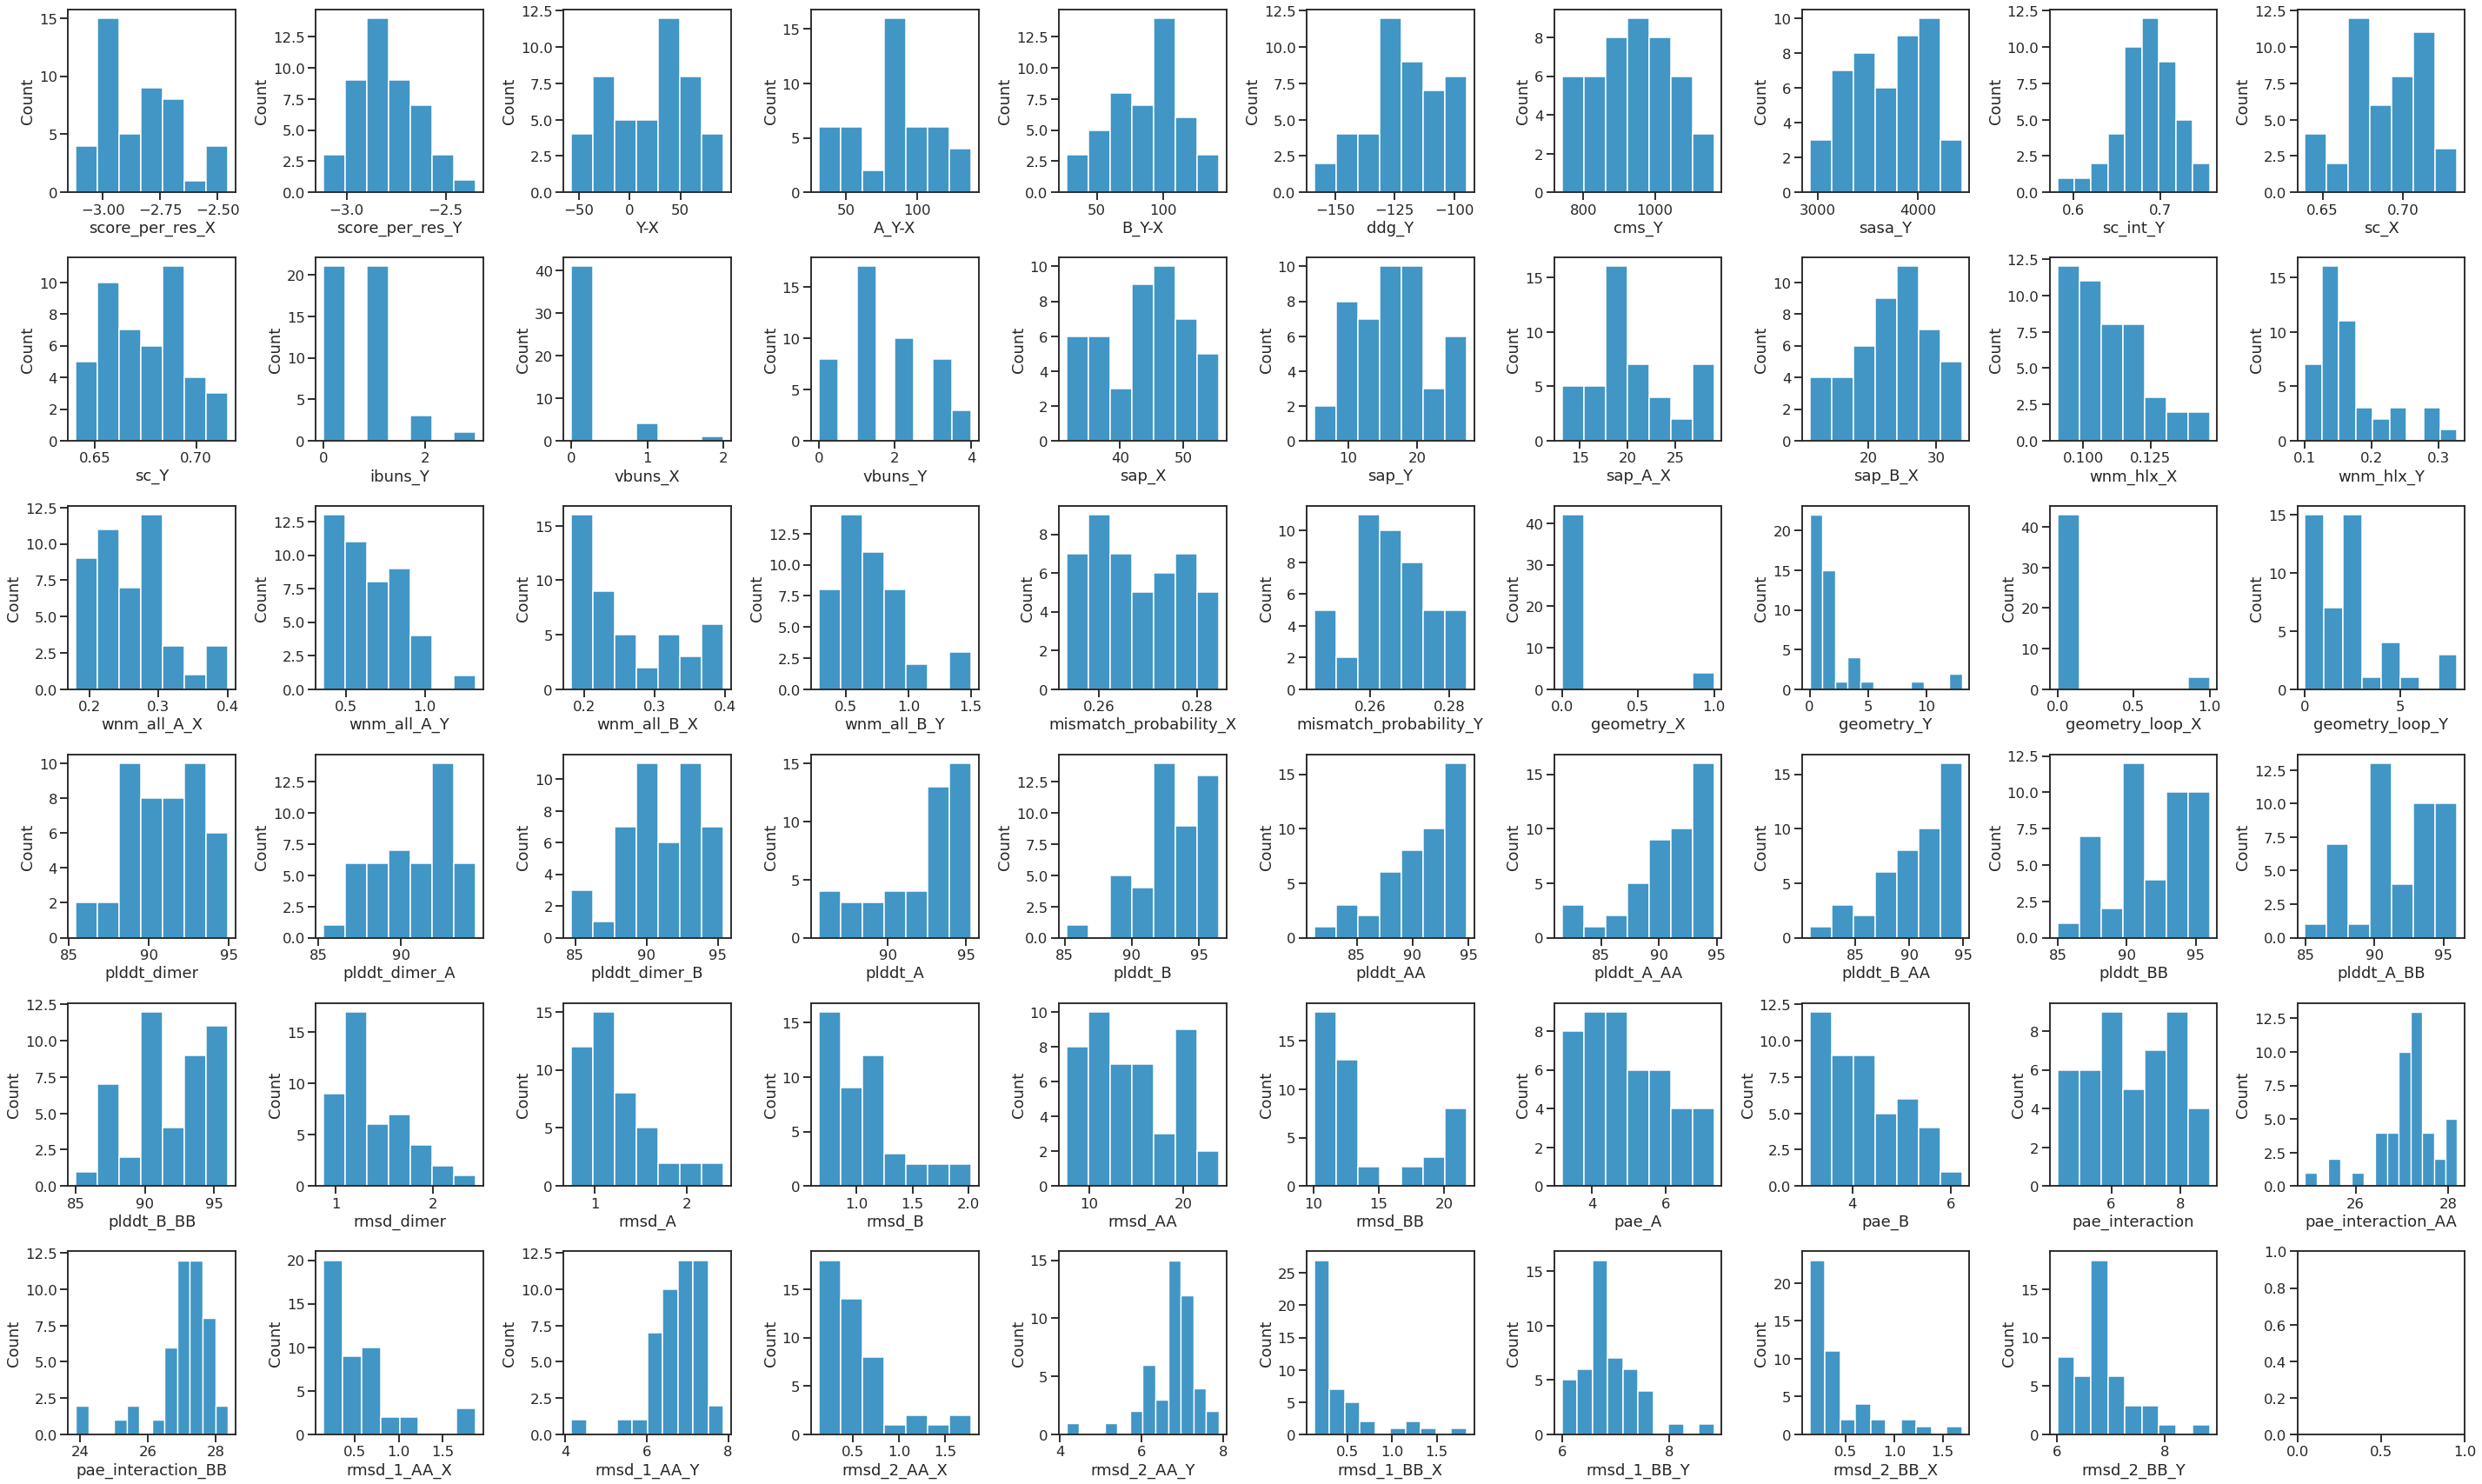

In [19]:
from crispy_shifty.plotting.utils import histplot_df

sns.set(
    context="talk",
    font_scale=1,  # make the font larger; default is pretty small
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

cols = [
        "score_per_res_X",
        "score_per_res_Y",
        "Y-X",
        "A_Y-X",
        "B_Y-X",
        "ddg_Y",
        "cms_Y",
        "sasa_Y",
        "sc_int_Y",
        "sc_X",
        "sc_Y",
        "ibuns_Y",
        "vbuns_X",
        "vbuns_Y",
        "sap_X",
        "sap_Y",
        "sap_A_X",
        "sap_B_X",
        "wnm_hlx_X",
        "wnm_hlx_Y",
        "wnm_all_A_X",
        "wnm_all_A_Y",
        "wnm_all_B_X",
        "wnm_all_B_Y",
        "mismatch_probability_X",
        "mismatch_probability_Y",
        "geometry_X",
        "geometry_Y",
        "geometry_loop_X",
        "geometry_loop_Y",
        'plddt_dimer',
        'plddt_dimer_A',
        'plddt_dimer_B',
        'plddt_A',
        'plddt_B',
        'plddt_AA',
        'plddt_A_AA',
        'plddt_B_AA',
        'plddt_BB',
        'plddt_A_BB',
        'plddt_B_BB',
        'rmsd_dimer',
        'rmsd_A',
        'rmsd_B',
        'rmsd_AA',
        'rmsd_BB',
        'pae_A',
        'pae_B',
        'pae_interaction',
        'pae_interaction_AA',
        'pae_interaction_BB',
        'rmsd_1_AA_X',
        'rmsd_1_AA_Y',
        'rmsd_2_AA_X',
        'rmsd_2_AA_Y',
        'rmsd_1_BB_X',
        'rmsd_1_BB_Y',
        'rmsd_2_BB_X',
        'rmsd_2_BB_Y',
    #     "parent",
    ]

# make sure all the columns to plot are numeric
# filtered_df[cols] = filtered_df[cols].astype(float)
fig, axs = histplot_df(non_homodimer_df, cols=cols, save_path='07_collect/predicted_dimer_monomer_nonhomodimer_metrics.png')

# pairplot these as well

In [20]:
print(non_homodimer_df['input_path'].nunique())
print(non_homodimer_df['parent'].nunique())

print(get_parents(non_homodimer_df))

21
12
12
['X18_4_22_4_ct0_ff', 'X19_3_17_2_ct9_fe', 'DHR62', 'X26_3_20_2_ct1_fe', 'hDHR64_5CWM', 'X20_3_25_2_ct9_fa', 'X22_3_16_4_ct4_fa', 'X19_3_18_4_ct4_fd', 'X18_4_23_4_ct3_ff', 'X26_3_24_2_ct12_fe', 'X23_2_15_3_ct5_fe', 'X19_3_17_2_ct6_fc']


In [24]:
non_homodimer_df.to_json('07_collect/predicted_dimer_monomer_nonhomodimer_metrics.json')

In [29]:
# Filter designs with rosetta metrics?

cutoffs = [
    ('sc_int_Y', 0.65, 1),
    ('Y-X', 50, 0),
]

filtered_nonhomodimer_df = filter_df(non_homodimer_df, cutoffs)
print(get_parents(filtered_nonhomodimer_df))

31
8
['DHR62', 'X26_3_20_2_ct1_fe', 'hDHR64_5CWM', 'X20_3_25_2_ct9_fa', 'X18_4_23_4_ct3_ff', 'X26_3_24_2_ct12_fe', 'X23_2_15_3_ct5_fe', 'X19_3_17_2_ct6_fc']


In [30]:
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    'display.max_rows', None,
):
    display(filtered_nonhomodimer_df)

,plddt_A,rmsd_A,plddt_B,rmsd_B,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,plddt_dimer_B,plddt_dimer,rmsd_dimer,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dssp_A,dssp_B,fa_dun,fa_intra_rep,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,model,new_loop_resis,new_loop_resis_A,new_loop_resis_B,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,remodel_after_loop_A,remodel_before_loop_A,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,ala_penalty,buns_X,buns_Y,cms_Y,ddg_Y,dslf_fa13,dslf_fa13_X,dslf_fa13_Y,exposed_hydrophobics_X,exposed_hydrophobics_Y,fa_atr,fa_atr_X,fa_atr_Y,fa_dun_dev,fa_dun_dev_X,fa_dun_dev_Y,fa_dun_rot,fa_dun_rot_X,fa_dun_rot_Y,fa_dun_semi,fa_dun_semi_X,fa_dun_semi_Y,fa_elec,fa_elec_X,fa_elec_Y,fa_intra_atr_xover4,fa_intra_atr_xover4_X,fa_intra_atr_xover4_Y,fa_intra_elec,fa_intra_elec_X,fa_intra_elec_Y,fa_intra_rep_xover4,fa_intra_rep_xover4_X,fa_intra_rep_xover4_Y,fa_intra_sol_xover4,fa_intra_sol_xover4_X,fa_intra_sol_xover4_Y,fa_rep,fa_rep_X,fa_rep_Y,fa_sol,fa_sol_X,fa_sol_Y,geometry_X,geometry_Y,geometry_loop_X,geometry_loop_Y,hbond_bb_sc,hbond_bb_sc_X,hbond_bb_sc_Y,hbond_lr_bb,hbond_lr_bb_X,hbond_lr_bb_Y,hbond_sc,hbond_sc_X,hbond_sc_Y,hbond_sr_bb,hbond_sr_bb_X,hbond_sr_bb_Y,hxl_tors,hxl_tors_X,hxl_tors_Y,ibuns_Y,lk_ball,lk_ball_X,lk_ball_Y,lk_ball_bridge,lk_ball_bridge_X,lk_ball_bridge_Y,lk_ball_bridge_uncpl,lk_ball_bridge_uncpl_X,lk_ball_bridge_uncpl_Y,lk_ball_iso,lk_ball_iso_X,lk_ball_iso_Y,mean_pae,mean_pae_interaction,mean_pae_interaction_AB,mean_pae_interaction_BA,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_pae_intra_chain_B,mean_plddt,met_penalty,mismatch_probability_X,mismatch_probability_Y,np_penalty,omega,omega_X,omega_Y,pTMscore,p_aa_pp,p_aa_pp_X,p_aa_pp_Y,pro_close,pro_close_X,pro_close_Y,rama_prepro,rama_prepro_X,rama_prepro_Y,recycles,ref,ref_X,ref_Y,remodel_after_loop_B,remodel_before_loop_B,rmsd_to_input,sap_A_X,sap_A_Y,sap_B_X,sap_B_Y,sap_X,sap_Y,sasa_Y,sbuns_X,sbuns_Y,sc_X,sc_Y,sc_int_Y,score_per_res_X,score_per_res_Y,tol,total_length_A,total_length_B,total_score,total_score_A_X,total_score_A_Y,total_score_B_X,total_score_B_Y,total_score_X,total_score_Y,vbuns_X,vbuns_Y,wnm_all_A_X,wnm_all_A_Y,wnm_all_B_X,wnm_all_B_Y,wnm_hlx_X,wnm_hlx_Y,msd_input_model,design_path,Y-X,A_Y-X,B_Y-X,int_upweight,input_path,pae_A_AA,pae_interaction_AA,pae_interaction1_AA,pae_interaction2_AA,pae_B_AA,plddt_A_AA,plddt_B_AA,plddt_AA,rmsd_AA,tag,pae_A_BB,pae_interaction_BB,pae_interaction1_BB,pae_interaction2_BB,pae_B_BB,plddt_A_BB,plddt_B_BB,plddt_BB,rmsd_BB,rmsd_1_AA_X,rmsd_1_AA_Y,rmsd_2_AA_X,rmsd_2_AA_Y,rmsd_1_BB_X,rmsd_1_BB_Y,rmsd_2_BB_X,rmsd_2_BB_Y
2ed2d160048f4d6bf5ca3d2fcf9c4f9e6c2caef06fe58007,90.964,1.917,94.073,0.83,3.418,4.67,4.718,4.621,3.148,93.86,95.0,94.43,1.153,XAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAGBAAA...,XAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAGBAAA...,104.146545,52.073273,52.073273,loop_remodel,loop_remodel,-1,481.578278,710.629456,476.059784,36,19,17,LHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHLLHHH...,LHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHLLHHH...,588.769918,623.720696,2.572,11.302313,12.605546,0.703684,0.734684,1.0,"85,86,257,258","85,86","85,86",DHR62,172,8.931612,projects/crispy_shifty_dimers/00_inputs/dhrsgo...,4,5,4,1.0,3.0,-1,0.752723,0.756303,0.752882,-1042.938477,-184.757065,-756.068115,-733.104065,-446.233643,-184.010742,-387.838409,-203.827667,-191.880386,-3.067466,1,-1,0.735907,monomer_ptm,0.201707,0.205583,0.194742,0.162313,0.781981,0.744621,0.137988,0.0,2,1,5,843.699158,-104.444984,0,0,0,568.067383,132.661423,-4197.990431,-2069.644531,-2128.345703,89.361853,35.513828,53.848026,477.645438,241.896988,235.74

hmm, maybe a better option would be to just look at all the nonhomodimer designs and order the best from each parent.

In [21]:
tags = []
design_paths = []
with open('07_collect/predicted_dimer_monomer_nonhomodimer_designs.list', 'w') as f:
    for index in non_homodimer_df.index:
        design_path = filtered_df.loc[index, 'design_path']
        design_paths.append(design_path)
        f.write(design_path + '\n')
        tag = design_path.split('/')[-1][:-4]
        tags.append(tag + '_AA_af2pred')
        tags.append(tag + '_BB_af2pred')

In [22]:
# prints a string to load in design models
print('; '.join(['load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/' + path for path in design_paths]))

load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_01/design_models/X18_4_22_4_ct0_ff_3b8262cc053ebc07ee3fd835ae77133151771ae807fc5008.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_01/design_models/X19_3_17_2_ct9_fe_4897fab63d89915038fb34428d78270b071888829ae19634.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_23/design_models/DHR62_2ed2d160048f4d6bf5ca3d2fcf9c4f9e6c2caef06fe58007.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_23/design_models/DHR62_140de708d1860ed9bb4812d329fa6e4523f398d750724e7c.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_23/design_models/DHR62_1c37ae76d147f985e71d3a67571bbb02e48bf0618dd0d0ba.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/pre

In [15]:
with open('07_collect/predicted_dimer_monomer_nonhomodimer_designs.list', 'r') as f:
    design_paths = f.read().splitlines()
print(len(design_paths))

0


In [23]:
# But, probably better to look at AF2 models for ordering

af2_dimer_paths = []
af2_monomer_A_paths = []
af2_monomer_B_paths = []

for path in design_paths:
    path_split = path.split('/')
    path_split[-2] = 'af2_models'
    af2_dimer_paths.append('/'.join(path_split[:-1] + [path_split[-1][:-4] + '_dimer.pdb']))
    af2_monomer_A_paths.append('/'.join(path_split[:-1] + [path_split[-1][:-4] + '_monomer_A.pdb']))
    af2_monomer_B_paths.append('/'.join(path_split[:-1] + [path_split[-1][:-4] + '_monomer_B.pdb']))

print('; '.join(['load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/' + path for path in af2_dimer_paths]))
print('; '.join(['load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/' + path for path in af2_monomer_A_paths]))
print('; '.join(['load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/' + path for path in af2_monomer_B_paths]))

load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_01/af2_models/X18_4_22_4_ct0_ff_3b8262cc053ebc07ee3fd835ae77133151771ae807fc5008_dimer.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_01/af2_models/X19_3_17_2_ct9_fe_4897fab63d89915038fb34428d78270b071888829ae19634_dimer.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_23/af2_models/DHR62_2ed2d160048f4d6bf5ca3d2fcf9c4f9e6c2caef06fe58007_dimer.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_23/af2_models/DHR62_140de708d1860ed9bb4812d329fa6e4523f398d750724e7c_dimer.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_23/af2_models/DHR62_1c37ae76d147f985e71d3a67571bbb02e48bf0618dd0d0ba_dimer.pdb; load ~/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafol

In [34]:
print(f"echo \"{' '.join(tags)}\" | silentextractspecific ../af2_predictions.silent")

echo "X18_4_22_4_ct0_ff_3b8262cc053ebc07ee3fd835ae77133151771ae807fc5008_AA_af2pred X18_4_22_4_ct0_ff_3b8262cc053ebc07ee3fd835ae77133151771ae807fc5008_BB_af2pred X19_3_17_2_ct9_fe_4897fab63d89915038fb34428d78270b071888829ae19634_AA_af2pred X19_3_17_2_ct9_fe_4897fab63d89915038fb34428d78270b071888829ae19634_BB_af2pred DHR62_2ed2d160048f4d6bf5ca3d2fcf9c4f9e6c2caef06fe58007_AA_af2pred DHR62_2ed2d160048f4d6bf5ca3d2fcf9c4f9e6c2caef06fe58007_BB_af2pred DHR62_140de708d1860ed9bb4812d329fa6e4523f398d750724e7c_AA_af2pred DHR62_140de708d1860ed9bb4812d329fa6e4523f398d750724e7c_BB_af2pred DHR62_1c37ae76d147f985e71d3a67571bbb02e48bf0618dd0d0ba_AA_af2pred DHR62_1c37ae76d147f985e71d3a67571bbb02e48bf0618dd0d0ba_BB_af2pred DHR62_514c4d9d26fe9acd9bf1c6866578bd6556eb657c9120b6f0_AA_af2pred DHR62_514c4d9d26fe9acd9bf1c6866578bd6556eb657c9120b6f0_BB_af2pred DHR62_546e613075b33dd36b6e35a01f414b8e312a341a37f67161_AA_af2pred DHR62_546e613075b33dd36b6e35a01f414b8e312a341a37f67161_BB_af2pred DHR62_03d9c3092f8f7cb5

From manual inspection of the homodimers, the following are slightly questionable.
DHR62_2ed2d160048f4d6bf5ca3d2fcf9c4f9e6c2caef06fe58007_AA_af2pred
X18_4_23_4_ct3_ff_01ad72736c75f60a0eca6f7bccf50bbcb87b36c8c1bd2083_AA_af2pred